In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/home/admn/Downloads/student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


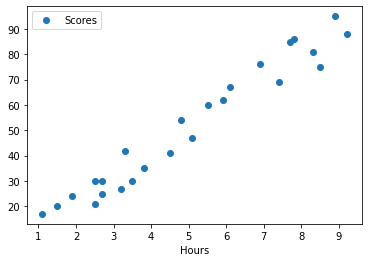

In [4]:
df.plot(x="Hours", y="Scores", style="o")
plt.show()

In [5]:
x_mean = df["Hours"].mean()
y_mean = df["Scores"].mean()
print(x_mean, y_mean)

5.012 51.48


In [6]:
df["x"] = df["Hours"] - x_mean
df["y"] = df["Scores"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df

,Hours,Scores,x,y,x*y,x^2,y^2
0,2.5,21,-2.512,-30.48,76.56576,6.310144,929.0304
1,5.1,47,0.088,-4.48,-0.39424,0.007744,20.0704
2,3.2,27,-1.812,-24.48,44.35776,3.283344,599.2704
3,8.5,75,3.488,23.52,82.03776,12.166144,553.1904
4,3.5,30,-1.512,-21.48,32.47776,2.286144,461.3904
5,1.5,20,-3.512,-31.48,110.55776,12.334144,990.9904
6,9.2,88,4.188,36.52,152.94576,17.539344,1333.7104
7,5.5,60,0.488,8.52,4.15776,0.238144,72.5904
8,8.3,81,3.288,29.52,97.06176,10.810944,871.4304
9,2.7,25,-2.312,-26.48,61.22176,5.345344,701.1904


In [7]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)

1495.9560000000001 153.0264 15346.24


In [8]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation

0.9761906560220887

In [9]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5

In [10]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

2.47407679751458 24.775988375844868


In [11]:
m = correlation * (std_deviation_y / std_deviation_x)
m

9.775803390787473

In [12]:
c = df["Scores"].mean() - m * df["Hours"].mean()
c

2.4836734053731817

In [13]:
df["y_prediction"] = m * df["Hours"] + c
df

,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction
0,2.5,21,-2.512,-30.48,76.56576,6.310144,929.0304,26.923182
1,5.1,47,0.088,-4.48,-0.39424,0.007744,20.0704,52.340271
2,3.2,27,-1.812,-24.48,44.35776,3.283344,599.2704,33.766244
3,8.5,75,3.488,23.52,82.03776,12.166144,553.1904,85.578002
4,3.5,30,-1.512,-21.48,32.47776,2.286144,461.3904,36.698985
5,1.5,20,-3.512,-31.48,110.55776,12.334144,990.9904,17.147378
6,9.2,88,4.188,36.52,152.94576,17.539344,1333.7104,92.421065
7,5.5,60,0.488,8.52,4.15776,0.238144,72.5904,56.250592
8,8.3,81,3.288,29.52,97.06176,10.810944,871.4304,83.622842
9,2.7,25,-2.312,-26.48,61.22176,5.345344,701.1904,28.878343


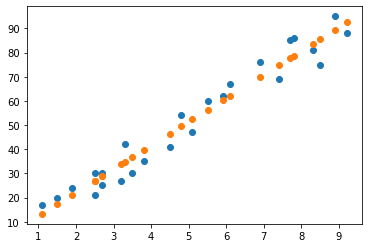

In [14]:
plot1 = plt.scatter(df["Hours"], df["Scores"])
plot2 = plt.scatter(df["Hours"], df["y_prediction"])
plt.show()

In [19]:
df["y_prediction"].mean()

51.47999999999999

In [20]:
def getSSR(df_pred):
    result = 0
    for i in range(len(df_pred)):
        result += (df_pred[i] - df_pred.mean())**2
    return result

In [21]:
getSSR(df["y_prediction"])

14624.171737268869

In [22]:
def getSST(df_actual):
    result = 0
    for i in range(len(df_actual)):
        result += (df_actual[i] - df_actual.mean())**2
    return result

In [23]:
getSST(df["Scores"])

15346.24

In [24]:
def getSSE(df_actual, df_pred):
    result = 0
    for i in range(len(df_actual)):
        result += (df_actual[i] - df_pred[i])**2
    return result

In [26]:
getSSE(df["Scores"], df["y_prediction"])

722.0682627311364

In [28]:
r2 = correlation**2
r2

0.9529481969048358

In [31]:
r2 = getSSR(df["y_prediction"])/getSST(df["Scores"])
r2

0.9529481969048359